In [1]:
import pandas as pd
import numpy as np
import os

In [28]:
path = '/Users/ibrahimraji/documents/pythonfiles/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
files = [file for file in os.listdir(path)]
mergedfile = pd.DataFrame()
for file in files:
    currentfile = pd.read_csv(path + '/' + file )
    mergedfile = pd.concat([mergedfile,currentfile])
#print(files)
mergedfile.head()
mergedfile.to_csv(path+"/"+"mergedfile.csv", index = False)

In [36]:
mergedfile["Order Amount"] = mergedfile["Quantity Ordered"] + mergedfile["Price Each"]
mergedfile.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Amount
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",11700
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",1600.0
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",111.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",1149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",111.95


###cleaning the data

In [58]:
mergedfile.describe()
mergedfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 13621
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Order Amount        185950 non-null object
dtypes: object(7)
memory usage: 11.3+ MB


In [75]:
mergedfile.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Amount
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",11700
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",1600.0
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",111.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",1149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",111.95


In [53]:
selected_rows = mergedfile[mergedfile.isnull().all(axis=1)]


In [46]:
selected_rows.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Amount


In [55]:
mergedfile = mergedfile.dropna(how="all")

In [62]:
mergedfile = mergedfile[mergedfile["Quantity Ordered"].str[0:2] != "Qu"]

In [71]:
selectedqurows = mergedfile[mergedfile["Quantity Ordered"] == 1]
selectedqurows.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Amount


In [74]:
mergedfile["Quantity Ordered"] = pd.to_numeric(mergedfile["Quantity Ordered"])
mergedfile["Price Each"] = pd.to_numeric(mergedfile["Price Each"])

In [78]:
c

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [77]:
del mergedfile["Order Amount"]

In [79]:
mergedfile["Sales"] = mergedfile["Quantity Ordered"] * mergedfile["Price Each"]
mergedfile.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95


In [82]:
mergedfile["Order Date"] = pd.to_datetime(mergedfile["Order Date"])


In [93]:
mergedfile.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Quarter
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,December,Monday
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,December,Sunday
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,December,Thursday
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,December,Sunday
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,December,Wednesday


In [86]:
mergedfile['Month'] = mergedfile['Order Date'].dt.month_name()


In [89]:
mergedfile['Quarter'] = mergedfile['Order Date'].dt.day_name()


In [95]:
mergedfile = mergedfile.rename(columns = {"Quarter":"Day", "Price Each":"Price", "Quantity Ordered":"Quantity"})

In [96]:
mergedfile.head()

,Order ID,Product,Quantity,Price,Order Date,Purchase Address,Sales,Month,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,December,Monday
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,December,Sunday
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,December,Thursday
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,December,Sunday
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,December,Wednesday


In [97]:
mergedfile.to_csv(path+"/"+"mergedfile.csv", index = False)

In [100]:
mergedfile.groupby("Month").sum()
Sales_Summary = mergedfile.groupby("Month").sum()

In [101]:
Sales_Summary.head()

,Quantity,Price,Sales
Month,,,
April,20558,3.367671e+06,3.390670e+06
August,13448,2.230345e+06,2.244468e+06
December,28114,4.588415e+06,4.613443e+06
February,13449,2.188885e+06,2.202022e+06
January,10903,1.811768e+06,1.822257e+06


In [102]:
Sales_Summary.to_csv(path+"/"+"Sales_Summary.csv", index = False)

In [108]:
mergedfile.groupby("Product").sum()

,Quantity,Price,Sales
Product,,,
20in Monitor,4129,451068.99,454148.71
27in 4K Gaming Monitor,6244,2429637.70,2435097.56
27in FHD Monitor,7550,1125974.93,1132424.50
34in Ultrawide Monitor,6199,2348718.19,2355558.01
AA Batteries (4-pack),27635,79015.68,106118.40
AAA Batteries (4-pack),31017,61716.59,92740.83
Apple Airpods Headphones,15661,2332350.00,2349150.00
Bose SoundSport Headphones,13457,1332366.75,1345565.43
Flatscreen TV,4819,1440000.00,1445700.00


In [109]:
import matplotlib.pyplot as plt

['May', 'October', 'July', 'June', 'December', 'September', 'August', 'January', 'April', 'March', 'February', 'November']


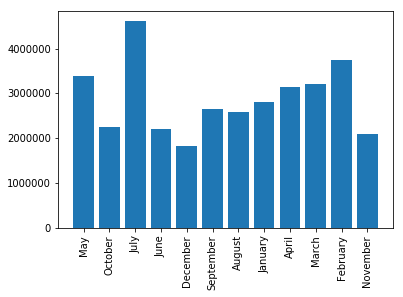

In [131]:
Month = {Month for Month in mergedfile["Month"]}
Month_list = []
for month in Month:
    Month_list.append(month)
print(Month_list)
plt.bar(Month_list,mergedfile.groupby(['Month']).sum()['Sales'])
plt.xticks(Month_list, rotation='vertical')
plt.show()
#print(Month)

In [163]:
mergedfile.head()

,Order ID,Product,Quantity,Price,Order Date,Purchase Address,Sales,Month,Day,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,December,Monday,New York City( NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,December,Sunday,New York City( NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,December,Thursday,New York City( NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,December,Sunday,San Francisco( CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,December,Wednesday,Atlanta( GA)


In [148]:
mergedfile["City"] = mergedfile["Purchase Address"].apply(lambda x: x.split(",")[1] + "(" + x.split(",")[2][0:3].strip() + ")")


In [178]:
mergedfile.groupby("City").sum()["Sales"]
cityfile = mergedfile.groupby("City").sum()["Sales"]
cityfile.to_csv("Cityfile")
cityfile.head(100)

City
 Atlanta( GA)          2.795499e+06
 Austin( TX)           1.819582e+06
 Boston( MA)           3.661642e+06
 Dallas( TX)           2.767975e+06
 Los Angeles( CA)      5.452571e+06
 New York City( NY)    4.664317e+06
 Portland( ME)         4.497583e+05
 Portland( OR)         1.870732e+06
 San Francisco( CA)    8.262204e+06
 Seattle( WA)          2.747755e+06
Name: Sales, dtype: float64

[' Atlanta( GA)', ' Los Angeles( CA)', ' Dallas( TX)', ' Seattle( WA)', ' Portland( OR)', ' Austin( TX)', ' San Francisco( CA)', ' Boston( MA)', ' Portland( ME)', ' New York City( NY)']


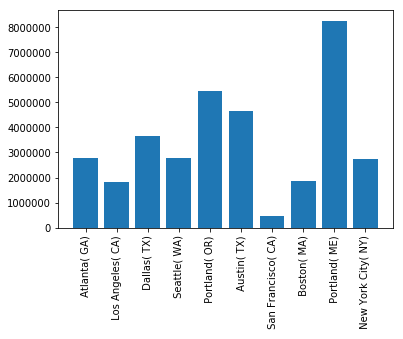

In [169]:
Cities = {x for x in mergedfile["City"]}
City = []
for city in Cities:
    City.append(city)
print(City)
plt.bar(City, mergedfile.groupby("City").sum()["Sales"])
plt.xticks(rotation='vertical', size = 10)
plt.show()

In [174]:
mergedfile.head()

,Order ID,Product,Quantity,Price,Order Date,Purchase Address,Sales,Month,Day,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,December,Monday,New York City( NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,December,Sunday,New York City( NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,December,Thursday,New York City( NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,December,Sunday,San Francisco( CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,December,Wednesday,Atlanta( GA),12


In [180]:
mergedfile["Hour"] = mergedfile["Order Date"].dt.hour

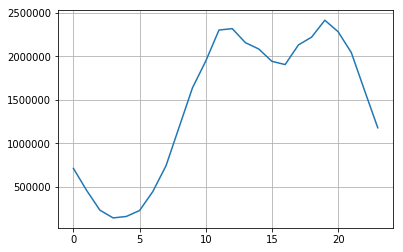

In [196]:
mergedfile.groupby("Hour").sum()["Sales"]
Hour = [Hour for Hour, df in mergedfile.groupby(['Hour'])]
plt.plot(Hour,mergedfile.groupby("Hour").sum()["Sales"])
plt.grid()

In [192]:
mergedfile.groupby("Day").sum()["Sales"]

Day
Friday       4.855938e+06
Monday       4.883327e+06
Saturday     4.904357e+06
Sunday       4.932170e+06
Thursday     4.839465e+06
Tuesday      5.087957e+06
Wednesday    4.988822e+06
Name: Sales, dtype: float64

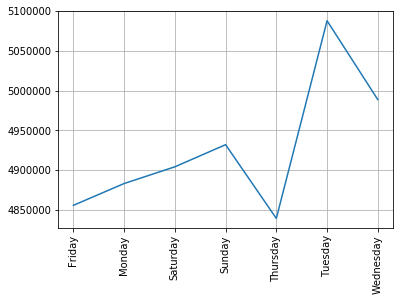

In [210]:
Day = [Day for Day, df in mergedfile.groupby(["Day"])]
#plt.pie(Day, mergedfile.groupby("Day").sum()["Sales"])
plt.plot(Day,mergedfile.groupby("Day").sum()["Sales"])
plt.xticks(rotation = 'vertical')
#print(Day)
plt.grid()
plt.show()

In [203]:
mergedfile.groupby("Product").sum()["Quantity"]

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity, dtype: int64

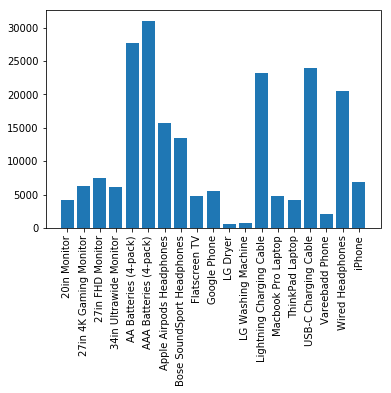

In [208]:
Product = [Product for Product, df in mergedfile.groupby(["Product"])]
#print(Product)
plt.bar(Product,mergedfile.groupby("Product").sum()["Quantity"])
plt.xticks(rotation = 'vertical')
plt.show()

In [235]:
mergedfile.head()

,Order ID,Product,Quantity,Price,Order Date,Purchase Address,Sales,Month,Day,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,December,Monday,New York City( NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,December,Sunday,New York City( NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,December,Thursday,New York City( NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,December,Sunday,San Francisco( CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,December,Wednesday,Atlanta( GA),12


In [258]:
datasum = mergedfile.groupby(["Day","Product","Month"]).sum()["Sales"]
datasum.head(200)

Day     Product                 Month    
Friday  20in Monitor            April         6049.45
                                August        4179.62
                                December      9019.18
                                February      3739.66
                                January       4509.59
                                July          5279.52
                                June          5609.49
                                March         5499.50
                                May           6269.43
                                November      8029.27
                                October       6269.43
                                September     4729.57
        27in 4K Gaming Monitor  April        33929.13
                                August       20279.48
                                December     46408.81
                                February     23399.40
                                January      16379.58
                                July    

In [236]:
mergedfile.dropna(how="any")

,Order ID,Product,Quantity,Price,Order Date,Purchase Address,Sales,Month,Day,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,December,Monday,New York City( NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,December,Sunday,New York City( NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,December,Thursday,New York City( NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,December,Sunday,San Francisco( CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,December,Wednesday,Atlanta( GA),12
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",3.84,December,Tuesday,New York City( NY),22
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",11.95,December,Monday,Portland( OR),15
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",23.90,December,Friday,Dallas( TX),9
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",99.99,December,Sunday,Dallas( TX),23
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",11.96,December,Saturday,Dallas( TX),11


In [282]:
datasum = mergedfile.groupby(["Product","Month"]).sum()["Sales"]
datasum.head(20)
datasum["Sales"] = mergedfile.groupby(["Product","Month"]).sum()["Sales"]
product = [product for product, df in mergedfile.groupby(["Product"])]
month = [month for month, df in mergedfile.groupby(["Month"])]
#for prdct in product:
    #plt.bar(month,datasum["Sales"])
#Day = [Day for Day, df in mergedfile.groupby(["Day"])]

20in Monitor
27in 4K Gaming Monitor
27in FHD Monitor
34in Ultrawide Monitor
AA Batteries (4-pack)
AAA Batteries (4-pack)
Apple Airpods Headphones
Bose SoundSport Headphones
Flatscreen TV
Google Phone
LG Dryer
LG Washing Machine
Lightning Charging Cable
Macbook Pro Laptop
ThinkPad Laptop
USB-C Charging Cable
Vareebadd Phone
Wired Headphones
iPhone


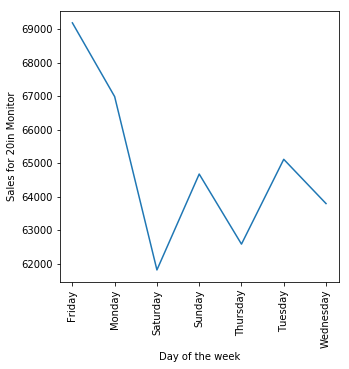

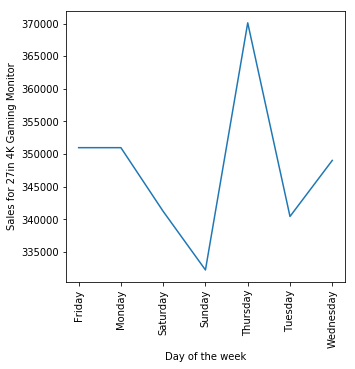

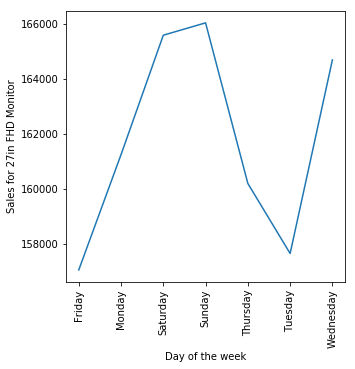

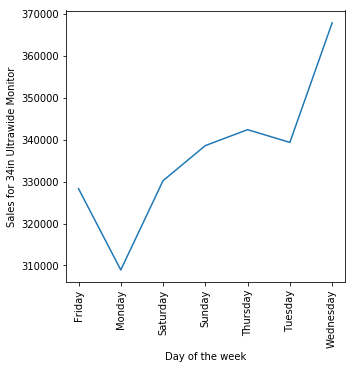

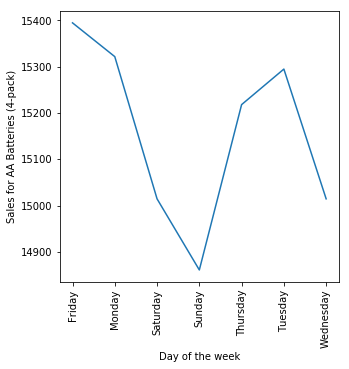

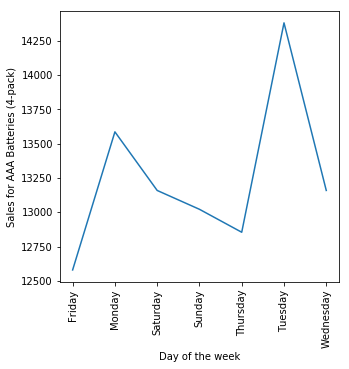

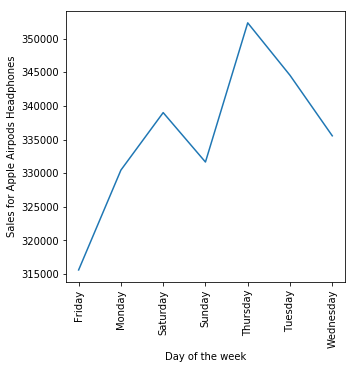

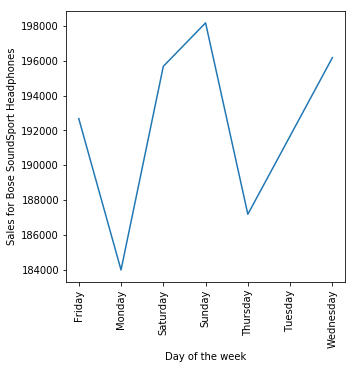

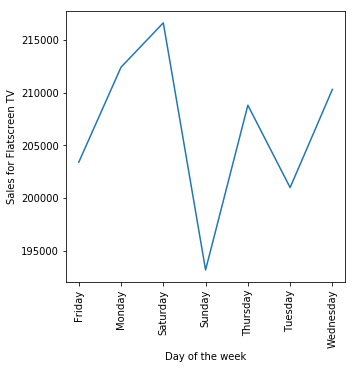

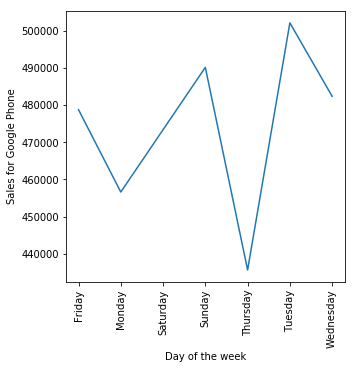

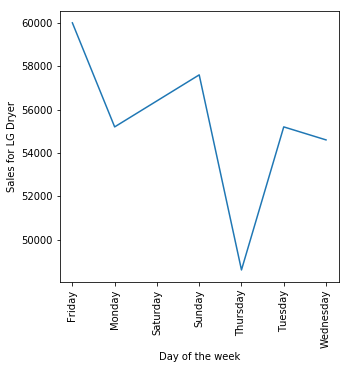

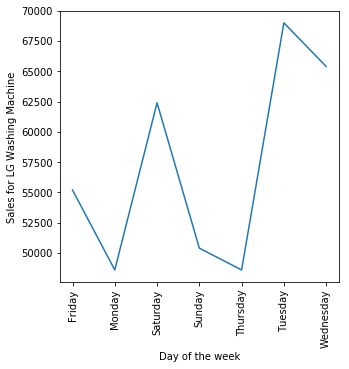

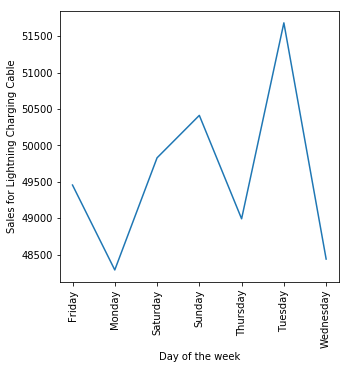

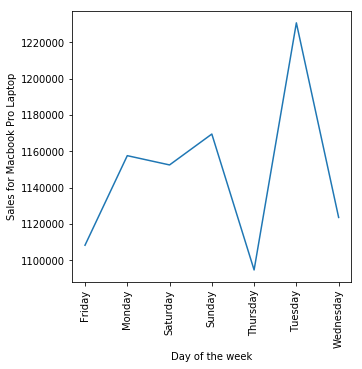

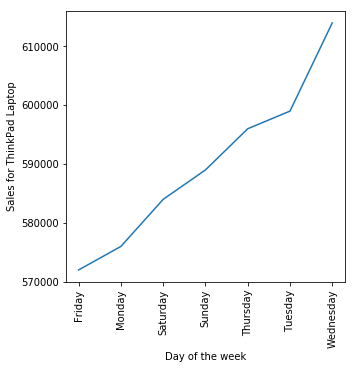

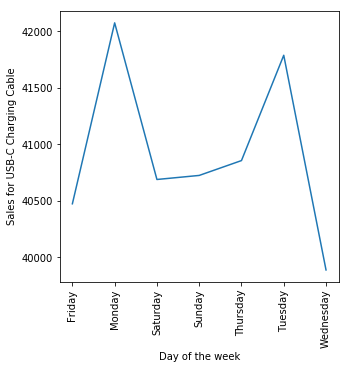

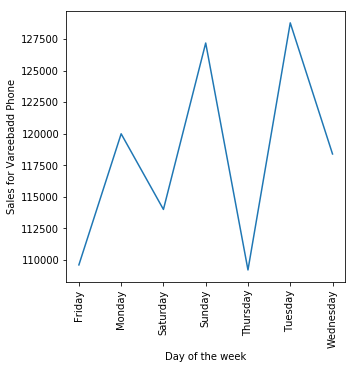

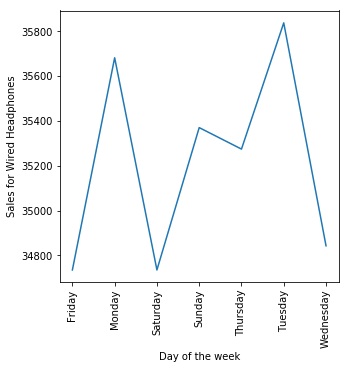

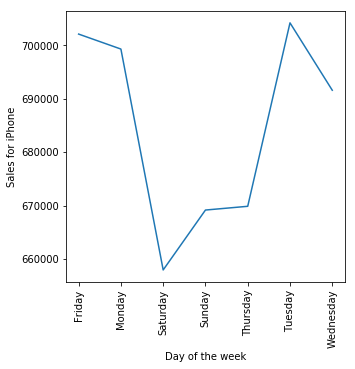

In [303]:
Products = [Product for Product, df in mergedfile.groupby(["Product"])]
Day = [Day for Day, df in mergedfile.groupby(["Day"])]
#colors = ['red', 'green']
#print(Products)
#print(Day)
for i in Products:
    print(i)
    selectedproduct = mergedfile[mergedfile["Product"] == i]
    fig, ax = plt.subplots(figsize=(5,5))
    #bar = mergedfile.groupby(Product).size().plot(kind='bar', color=colors, ax=ax)
    #g.apply(lambda x: x[x['key2'] == 'one']['data1'].sum())
    #plt.bar(Day, mergedfile.groupby("Day").apply(lambda x:x[mergedfile["Quantity"] > 1 ]).sum()["Sales"])
    plt.plot(Day, selectedproduct.groupby("Day").sum()["Sales"])
    plt.xticks(rotation='vertical')
    plt.xlabel("Day of the week")
    plt.ylabel("Sales for {}".format(i))

In [281]:
datasum.head()

Product       Month   
20in Monitor  April       43226.1
              August      28707.4
              December    62584.3
              February    27057.5
              January     23977.8
Name: Sales, dtype: object

In [299]:
selected.head()

,Order ID,Product,Quantity,Price,Order Date,Purchase Address,Sales,Month,Day,City,Hour
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.0,December,Monday,New York City( NY),0
52,295712,Macbook Pro Laptop,1,1700.0,2019-12-10 20:02:00,"331 Madison St, New York City, NY 10001",1700.0,December,Tuesday,New York City( NY),20
57,295717,Macbook Pro Laptop,1,1700.0,2019-12-25 09:51:00,"82 10th St, San Francisco, CA 94016",1700.0,December,Wednesday,San Francisco( CA),9
223,295871,Macbook Pro Laptop,1,1700.0,2019-12-28 11:19:00,"661 Park St, Dallas, TX 75001",1700.0,December,Saturday,Dallas( TX),11
304,295948,Macbook Pro Laptop,1,1700.0,2019-12-17 21:08:00,"863 West St, San Francisco, CA 94016",1700.0,December,Tuesday,San Francisco( CA),21
